# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# Create a list for holding the cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Add the latitudes and longitudes to a list.
#coordinates = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
           cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
record = 1 
sets = 1

city_list = []

for index, city in enumerate(cities):
         
    if record == 50:
            record += 1
            sets +=1
            time.sleep(60)
            
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        url = url + "&q="+ city.replace(" ", "+")
        response = requests.get(url).json()
                            
        city_lat = response['coord']['lat']
        city_lon = response['coord']['lon']
        city_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_description = response['weather'][0]['description']
        
        city_list.append({
            "city": city, 
            "lat": city_lat,
            "lon": city_lon,
            "temp_max": city_temp,
            "humidity": city_humidity,
            "clouds": city_clouds,
            "wind": city_wind,
            "country": city_country,
            "description": city_description
        })      
        
        print(f"Record located {city}")
       
    
    except:
        print(f"{city} not found")
        record +=1
        
        
              
print("------------------------------\nData Retrieval Complete\n------------------------------") 


Record located luderitz
Record located dikson
Record located jamestown
Record located mataura
Record located rikitea
Record located garissa
Record located busselton
Record located kirakira
Record located iqaluit
Record located avera
mahadday weyne not found
tsihombe not found
Record located college
Record located kihei
Record located castro
Record located hermanus
Record located ribeira grande
Record located salinas
Record located vaini
Record located airai
Record located kaitangata
Record located kijang
Record located asfi
Record located albany
Record located khatanga
Record located mahebourg
Record located lagoa
Record located qaanaaq
Record located arraial do cabo
Record located provideniya
Record located la cruz
Record located ushuaia
Record located tiksi
Record located sao lourenco do sul
Record located tessalit
taolanaro not found
Record located new norfolk
Record located bambous virieux
Record located punta arenas
Record located hualmay
Record located marsa matruh
Record located

Record located scottsbluff
Record located sovetskiy
Record located arroyo
Record located micheweni
Record located matara
Record located cosolapa
Record located kitimat
khonuu not found
Record located sterling
Record located hayvoron
Record located kamalpur
Record located lev tolstoy
Record located guerrero negro
Record located hambantota
Record located leningradskiy
Record located tilichiki
linapacan not found
Record located tigard
Record located roma
Record located kindu
Record located paraiso
Record located zyryanka
Record located pafos
Record located pedtad
attawapiskat not found
Record located shaoguan
Record located torbay
Record located goure
Record located binucayan
samalaeulu not found
Record located abha
Record located kruisfontein
Record located shingu
Record located severo-kurilsk
Record located ostersund
Record located maniitsoq
Record located burnie
skagastrond not found
Record located bilma
Record located fort nelson
Record located kalianget
Record located hovd
Record loc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
# Export data into csv
cities_df.to_csv("weather_check_output.csv")

In [103]:
#Output of csv file

In [104]:
#Create DataFrame
cities_df = pd.DataFrame(city_list)

cities_df

,city,lat,lon,temp_max,humidity,clouds,wind,country,description
0,luderitz,-26.65,15.16,56.34,89,1,14.45,NA,clear sky
1,dikson,73.51,80.55,10.60,95,84,17.78,RU,broken clouds
2,jamestown,42.10,-79.24,43.00,100,90,2.68,US,overcast clouds
3,mataura,-46.19,168.86,57.00,67,75,8.99,NZ,broken clouds
4,rikitea,-23.12,-134.97,75.54,86,100,15.08,PF,light rain
...,...,...,...,...,...,...,...,...,...
549,belfast,54.58,-5.93,43.00,93,100,2.24,GB,overcast clouds
550,pisco,-13.70,-76.22,63.00,77,0,6.93,PE,clear sky
551,grindavik,63.84,-22.43,37.40,74,75,24.16,IS,broken clouds
552,wexford,52.33,-6.46,52.00,93,100,8.01,IE,light rain


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

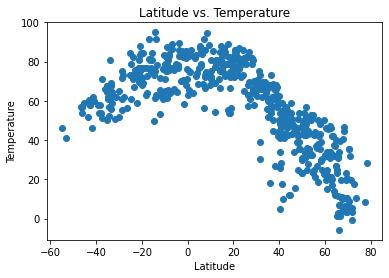

My Analysis


In [106]:
plt.scatter(cities_df["lat"], cities_df["temp_max"], marker = "o")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig("Pics/Temperature.png")
plt.show()

print("My Analysis")

## Latitude vs. Humidity Plot

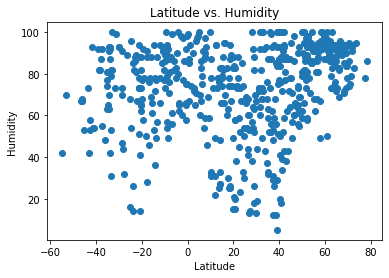

My Analysis


In [107]:
plt.scatter(cities_df["lat"], cities_df["humidity"], marker = "o")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Pics/Humidity.png")
plt.show()

print("My Analysis")

## Latitude vs. Cloudiness Plot

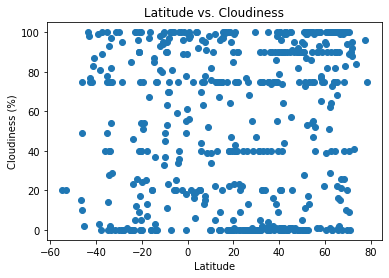

My Analysis


In [108]:
plt.scatter(cities_df["lat"], cities_df["clouds"], marker = "o")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Pics/Cloudiness.png")
plt.show()

print("My Analysis")

## Latitude vs. Wind Speed Plot

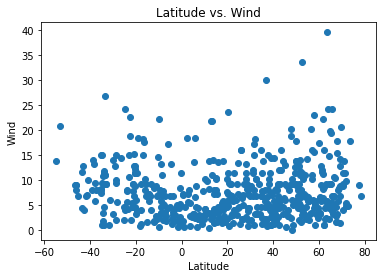

My Analysis


In [109]:
plt.scatter(cities_df["lat"], cities_df["wind"], marker = "o")
plt.title("Latitude vs. Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.savefig("Pics/Wind_Speed.png")
plt.show()

print("My Analysis")

## Linear Regression

In [126]:
#Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df["lat"].astype(float) > 0]
southern_df = cities_df.loc[cities_df["lat"].astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y= -1.02x+ 92.07
The r-squared is: 0.7452866613855671


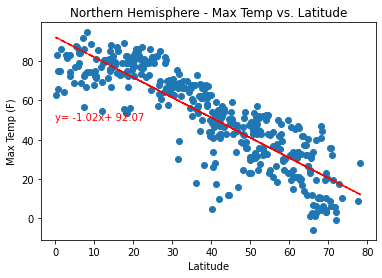

My Analysis


In [128]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["temp_max"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_MaxTempvs.Lat.png")
plt.show()

print("My Analysis")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y= 0.52x+ 81.09
The r-squared is: 0.3956366547400148


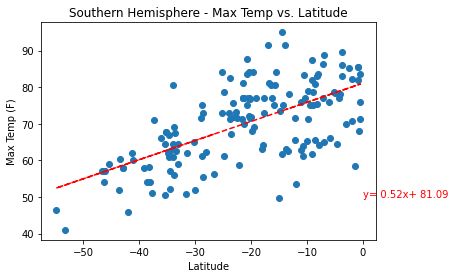

My Analysis


In [129]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["temp_max"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_MaxTempvs.Lat.png")
plt.show()

print("My Analysis")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.37x+ 59.04
The r-squared is: 0.1076627780874588


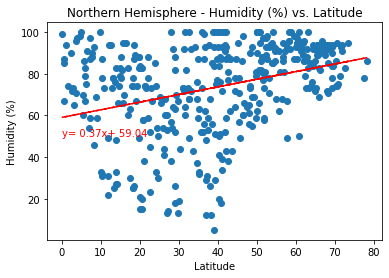

My Analysis


In [130]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["humidity"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_Humidityvs.Lat.png")
plt.show()

print("My Analysis")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.27x+ 78.25
The r-squared is: 0.03472291576940241


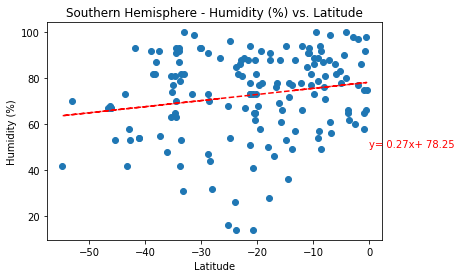

My Analysis


In [131]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["humidity"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_Humidityvs.Lat.png")
plt.show()

print("My Analysis")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.38x+ 37.01
The r-squared is: 0.03581420069518962


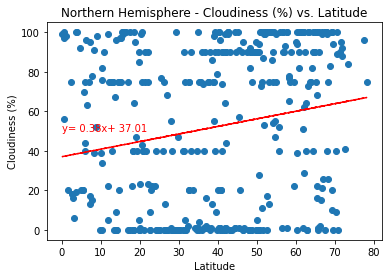

My Analysis


In [132]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["clouds"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_Cloudinessvs.Lat.png")
plt.show()

print("My Analysis")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y= 0.32x+ 58.38
The r-squared is: 0.012798087015448704


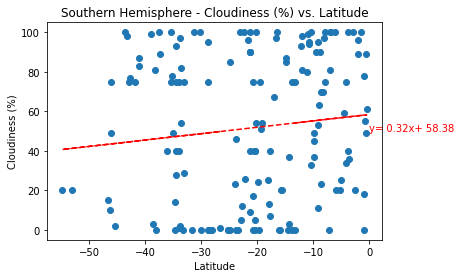

My Analysis


In [133]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["clouds"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_Cloudinessvs.Lat.png")
plt.show()

print("My Analysis")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y= 0.05x+ 5.17
The r-squared is: 0.038335320716949534


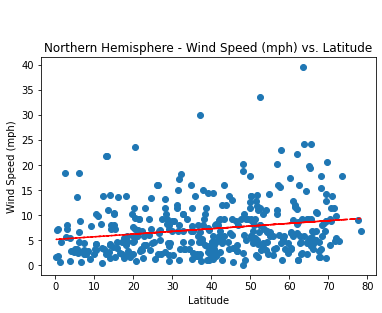

My Analysis


In [134]:
#Run Linear Regression Data
x_values = northern_df["lat"]
y_values = northern_df["wind"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/NorthernHem_WindSpeedvs.Lat.png")
plt.show()

print("My Analysis")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y= -0.11x+ 5.65
The r-squared is: 0.08125124866635819


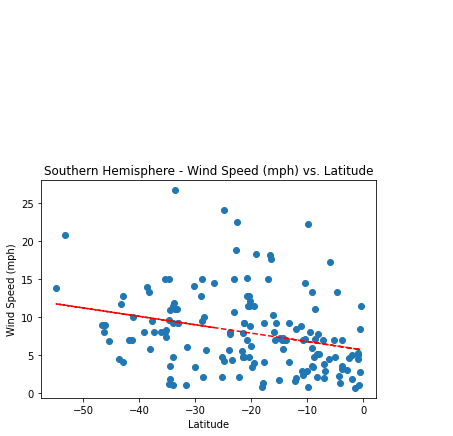

My Analysis


In [135]:
#Run Linear Regression Data
x_values = southern_df["lat"]
y_values = southern_df["wind"]

(slope, intercept, rvalue, pbalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(x_values,y_values)

#Plot regression line
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(0,50), fontsize = 10, color = "red")

#Title & Axis labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Pics/SouthernHem_WindSpeedvs.Lat.png")
plt.show()

print("My Analysis")